In [1]:
from TopTagger.preprocessing.image_preprocessing.preprocess import *
from TopTagger.preprocessing.image_preprocessing.useful_functions import *
from TopTagger.preprocessing.image_preprocessing.load import loadfiles
from TopTagger.preprocessing.image_preprocessing.jet_image_plotting import *

Load the test files for QCD and Top sample separately. These includes jets which are reconstructed with $R=0.8$ 
using antikT algorithm and only the hardest jet has been collected. Subjets are the constituents of these jets and they are sorted with respect to their $p_T$

By default, $\phi$ is shifted to $\phi^\prime\to\phi\in[-\pi,\pi)$.

In [2]:
subjet_QCD = loadfiles('collections/',sample=['test','QCD'], get_jets=False, nevent=1000)
subjet_top = loadfiles('collections/',sample=['test','top'], get_jets=False, nevent=1000)

In [3]:
subjet_QCD.shape, subjet_top.shape

((1000, 3), (1000, 3))

PS: it is possible to fit everything between $[0,\pi)$ (simply use Phi_0_pi(subjet)) but it distorts the central image and creates two centers one at 0 and other at $\pi$.

In [4]:
def plot(image_QCD,image_top,extent=[0,40,0,40],lim=[0,40,0,40]):
    fig, axarr = plt.subplots(1, 2, sharey=True)
    fig.set_size_inches(12, 6)
    axarr[0].imshow(np.array(image_QCD).mean(axis=0),extent=extent)
    axarr[1].imshow(np.array(image_top).mean(axis=0),extent=extent)  
    axarr[0].set_title('QCD')
    axarr[1].set_title(r'$t\bar{t}$')
    plt.tight_layout()
    axarr[0].set_xlim(lim[0:2])
    axarr[0].set_ylim(lim[2:4])
    axarr[1].set_xlim(lim[0:2])
    axarr[1].set_ylim(lim[2:4])
    #plt.savefig(os.path.join(workdir,'update_{}.png'.format(str(index).zfill(3))), bbox_inches = 'tight')
    plt.show()
    #plt.close('all')

Set the resolution to $(\Delta\eta\times\Delta\phi) = 0.04\times2.25^{\circ}$ note that to do this we need to span a larger pixel range than $40\times40$ because our $\phi$ is in between $[-\pi,\pi)$ instead of $[0,\pi)$. Default arrangement of the library is set $(\Delta\eta\times\Delta\phi) = 0.25\times9^\circ$ resolution. Thus in order to change this to fit a similar resolution with 1902.09914, the number of pixels need to be increased. For that reason the pixel ranges are set to $160\times160$ while the ranges are $\eta\in[-1.6,1.6]$ and $\phi\in[-\pi,\pi]$. This can be arranged using fig_config function and that needs to be used throughout the simulation.

In [5]:
config = fig_config(eta=[-1.6,1.6],phi=[-np.pi,np.pi],pixels=[160,160], extent='pixel')
base_image_QCD = create_image(subjet_QCD, config=config, treshold=0.)
base_image_top = create_image(subjet_top, config=config, treshold=0.)

In [6]:
np.array(base_image_QCD).shape

(992, 160, 160)

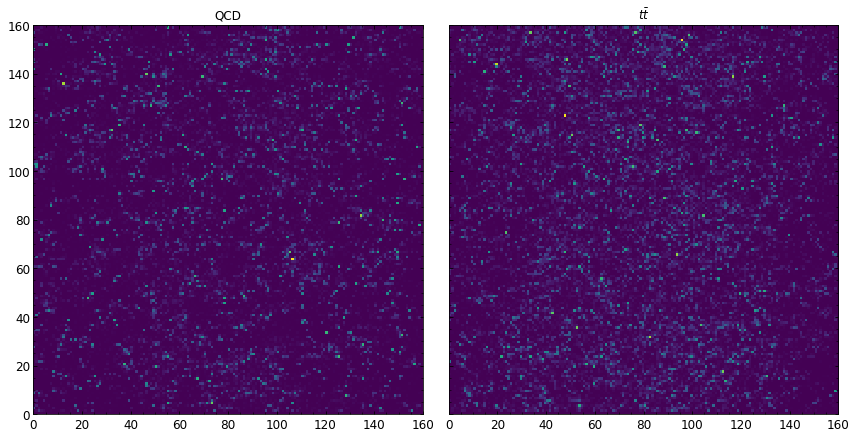

In [7]:
plot(base_image_QCD,base_image_top,extent=[0,160,0,160],lim=[0,160,0,160])
# just to save some space on RAM
del base_image_top, base_image_QCD

Shifted jets: ███████████████████████████| 99.9% Shifting...troids...


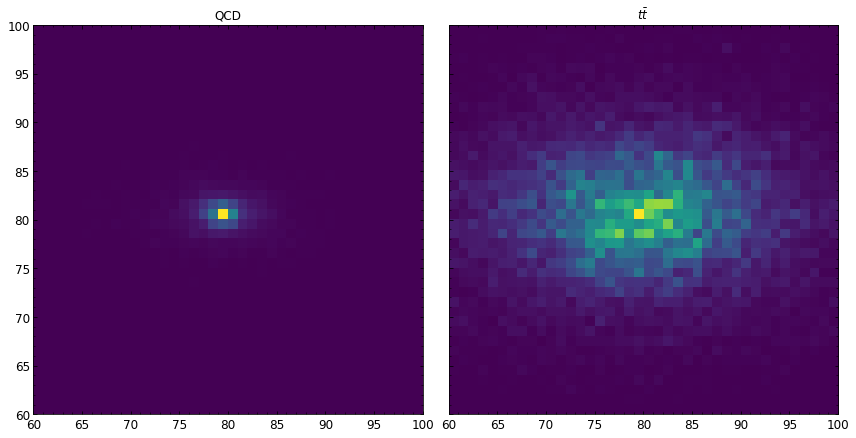


Rotated jets: ███████████████████████████| 99.9% Rotating... TanTheta


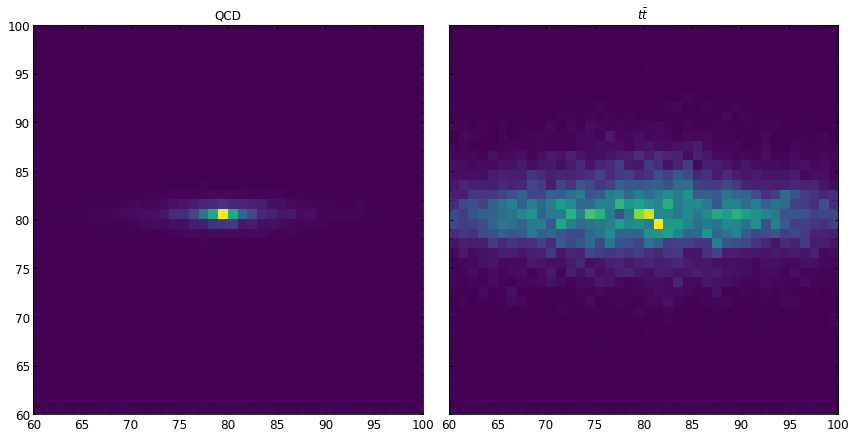


Normalized jets: ████████████████████████| 99.9% Normalizing...


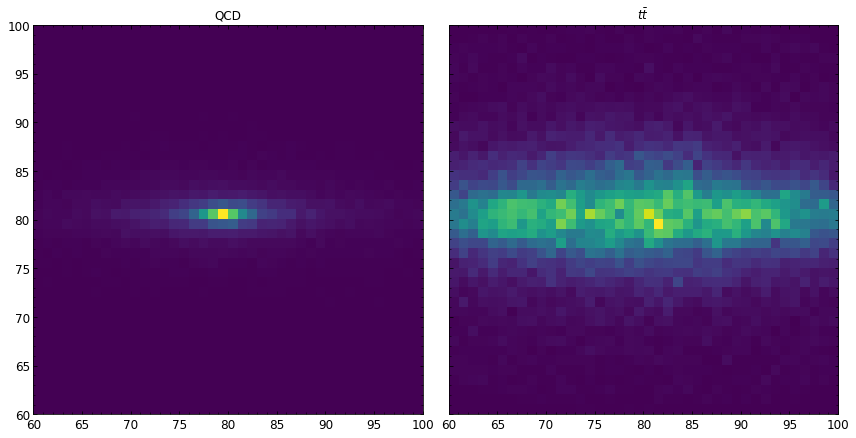

In [8]:
#Shift subjets to the frame of the hardest subjet 
#(shift function has access to the centroids of 
#the given cluster by center(subjet) function.)
shifted_QCD = shift(subjet_QCD)
shifted_top = shift(subjet_top)
print "Shifted jets: "
image_QCD = create_image(shifted_QCD, config=config, treshold=0.)
image_top = create_image(shifted_top, config=config, treshold=0.)
plot(image_QCD,image_top, extent=[0,160,0,160],lim=[60,100,60,100])
del image_QCD,image_top
print

#rotate the shifted jets towards the principal axis
rotated_QCD = rotate(shifted_QCD)
rotated_top = rotate(shifted_top)
print "Rotated jets: "
image_QCD = create_image(rotated_QCD, config=config, treshold=0.)
image_top = create_image(rotated_top, config=config, treshold=0.)
plot(image_QCD,image_top, extent=[0,160,0,160],lim=[60,100,60,100])
del image_QCD,image_top
print 


# normalize the subjets with LogNorm or normalize
norm_QCD    = LogNorm(rotated_QCD)
norm_top    = LogNorm(rotated_top)
print "Normalized jets: "
image_QCD = create_image(norm_QCD, config=config, treshold=0.)
image_top = create_image(norm_top, config=config, treshold=0.)
plot(image_QCD,image_top, extent=[0,160,0,160],lim=[60,100,60,100])
del image_QCD,image_top
print 

Vertically flipped jets: ████████████████| 99.9% Flipping 1000 image...


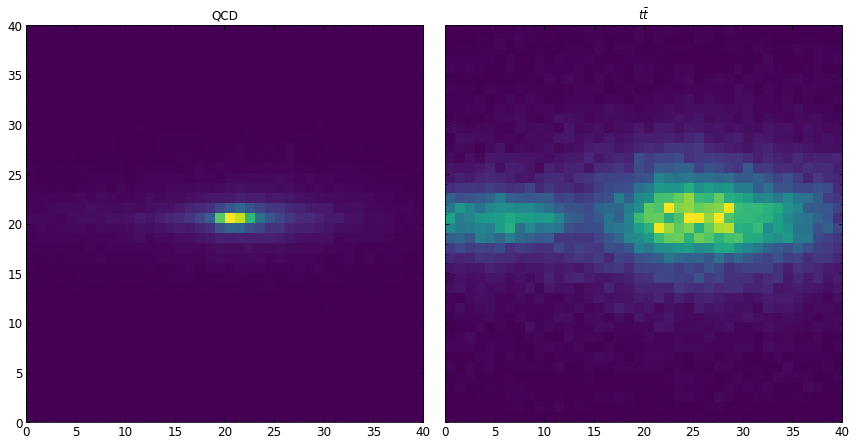


Horizontally flipped jets: ██████████████| 99.9% Flipping 1000 image...


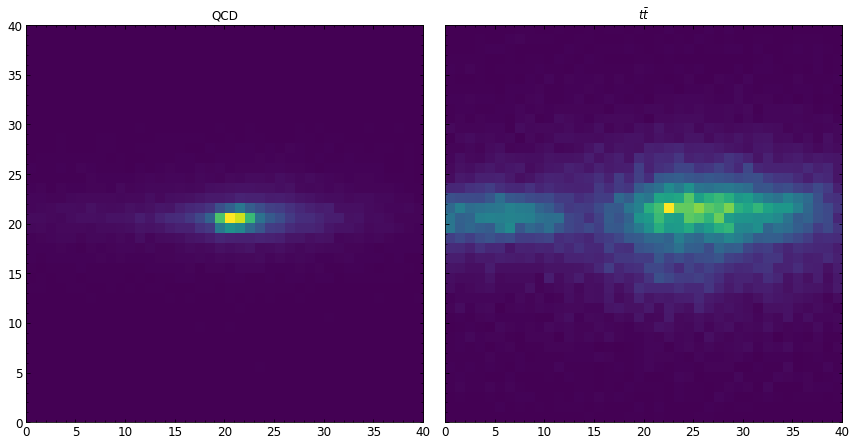

In [9]:
# Create the images
QCD_image = []
for image in create_image(norm_QCD, config=config, treshold=0.):
    QCD_image.append(image[60:100,60:100])
top_image = []
for image in create_image(norm_top, config=config, treshold=0.):
    top_image.append(image[60:100,60:100])

# flip the energetic jets to the right
QCD_vertically_flipped   = vertical_flip(QCD_image)
top_vertically_flipped   = vertical_flip(top_image)
print "Vertically flipped jets: "
plot(QCD_vertically_flipped,top_vertically_flipped, extent=[0,40,0,40],lim=[0,40,0,40])
print 

# flip the energetic jets to the top
QCD_horizontally_flipped = horizontal_flip(QCD_vertically_flipped)
top_horizontally_flipped = horizontal_flip(top_vertically_flipped)
print "Horizontally flipped jets: "
plot(QCD_horizontally_flipped,top_horizontally_flipped, extent=[0,40,0,40],lim=[0,40,0,40])
print 

n_image    = min([len(QCD_horizontally_flipped),len(top_horizontally_flipped)])
QCD_images = QCD_horizontally_flipped[0:n_image]
top_images = top_horizontally_flipped[0:n_image]

Standardize the images using a reference, ref can be total image, only signal, only background or nothing. Default setting gets the standard deviation of the reference image and normalizes the image to this std. Other option is to calculate the standard deviation through the nth moment (default 4th)

"A moment is a specific quantitative measure of the shape of a set of points. It is often used to calculate coefficients of skewness and kurtosis due to its close relationship with them."

Additionally default mode uses 0.02 noise suppression factor, this can be changed.

# Standardize the image with bkg+sig

In [10]:
config = fig_config(eta=[-1.6,1.6],phi=[-np.pi,np.pi],pixels=[40,40], extent='pixel')
standard_QCD = standardize_images(QCD_images, QCD_images+top_images, config=config, method='std', bias=0.002)
standard_top = standardize_images(top_images, QCD_images+top_images, config=config, method='std', bias=0.002)

Standardized jets: 


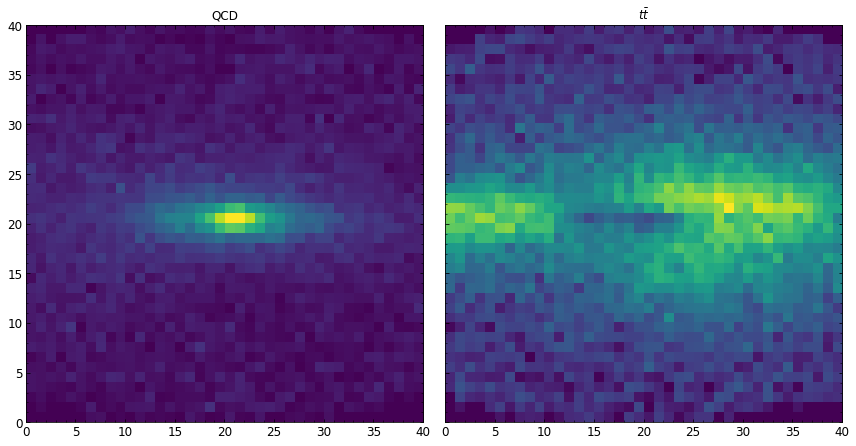

In [11]:
print "Standardized jets: "
plot(standard_QCD,standard_top)#, extent=[0,160,0,160],lim=[40,120,60,100])
print 

# Standardize the image with only background

Standardized jets: 


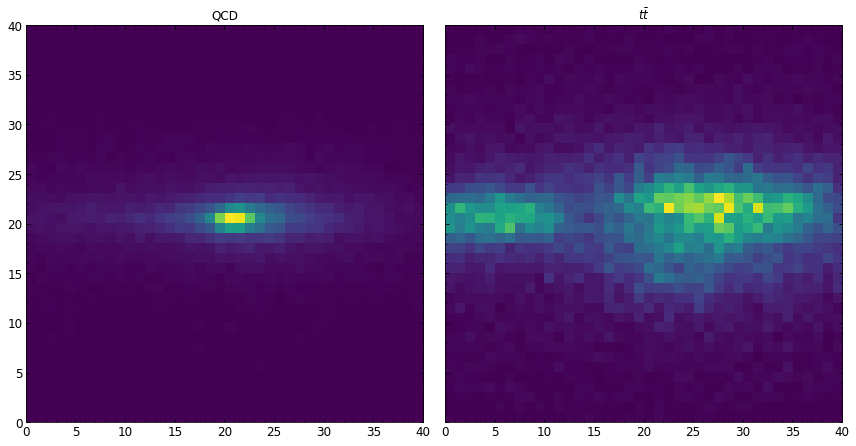

In [12]:
standard_QCD = standardize_images(QCD_images, QCD_images, config=config, method='n_moment', bias=1.)
standard_top = standardize_images(top_images, QCD_images, config=config, method='n_moment', bias=1.)
print "Standardized jets: "
plot(standard_QCD,standard_top)#,extent=[0,160,0,160],lim=[40,120,60,100])
print 

# Standardize the image with only signal

Standardized jets: 


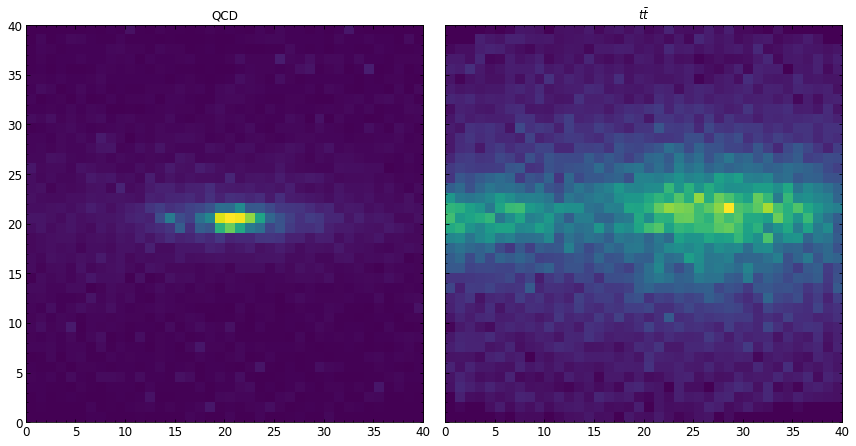

In [13]:
standard_QCD = standardize_images(QCD_images, top_images, config=config, method='n_moment')
standard_top = standardize_images(top_images, top_images, config=config, method='n_moment')
print "Standardized jets: "
plot(standard_QCD,standard_top)#, extent=[0,160,0,160],lim=[40,120,60,100])
print 